# Лабораторная работа:
# Обработка изображений и преобразование Фурье
---

Выполнил: \
Бессонов Александр (465220)  \
Тианов Вадим (467701)

---

## 1. Загрузка и визуализация исходного изображения

Размер изображения: (720, 1280, 3)


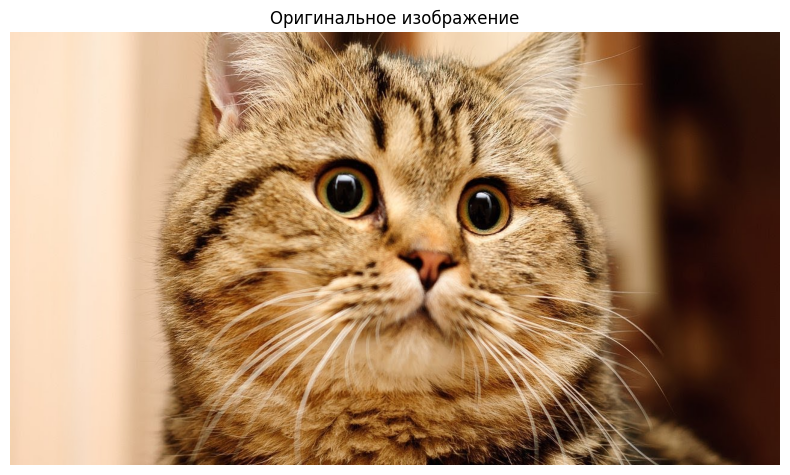

In [1]:
from core.image_processor import ImageProcessor
from core.channels import split_channels
import matplotlib.pyplot as plt

def show(img, title=""):
    cmap = 'gray' if len(img.shape) == 2 else None
    plt.figure(figsize=(8, 5))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

processor = ImageProcessor("/home/alexander/PycharmProjects/Lab-Math-CV-app/assets/sample.jpg")
image = processor.get_image()
print("Размер изображения:", image.shape)
show(image, "Оригинальное изображение")

---
## 2. Представление изображения как функции

Цветное изображение как функция $f: \mathbb{R}^2 \to \mathbb{R}^3$.
Серое изображение как функция $f: \mathbb{R}^2 \to \mathbb{R}$.

---
## 3. Отображение каналов RGB и их комбинаций

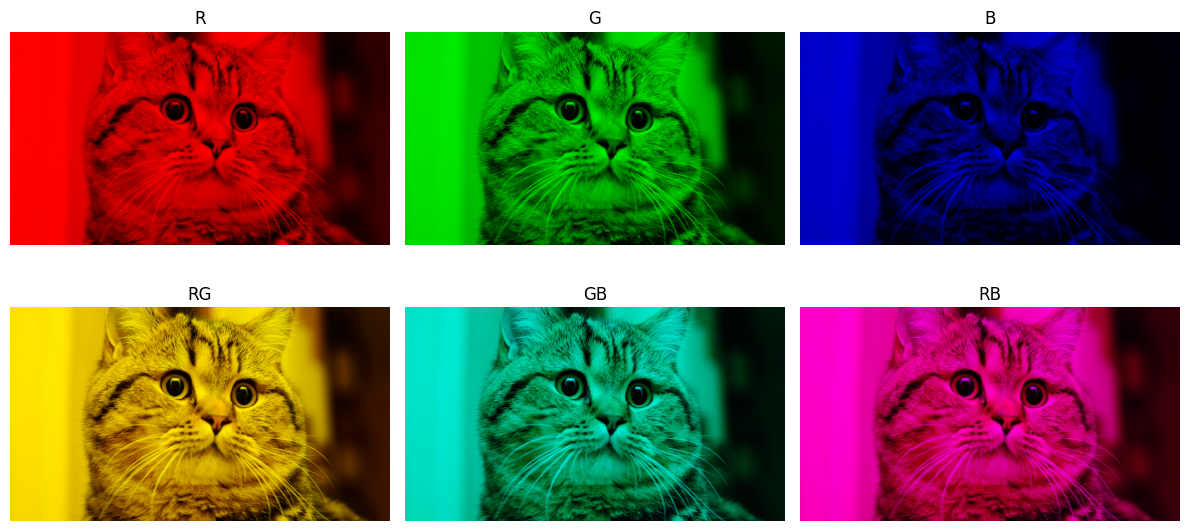

In [2]:
from core.channels import show_rgb_combinations
show_rgb_combinations(image)

---
## 4. Преобразование в градации серого

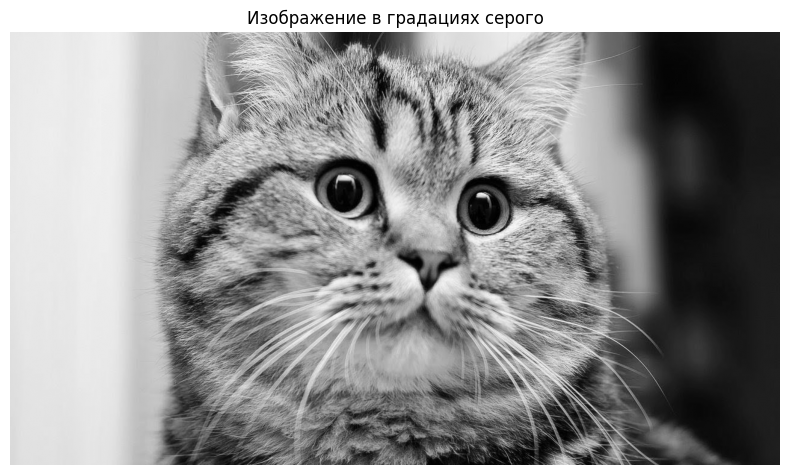

In [3]:
from core.grayscale import to_grayscale
gray = to_grayscale(image)
show(gray, "Изображение в градациях серого")

---
## 5. Графики интенсивности по строкам

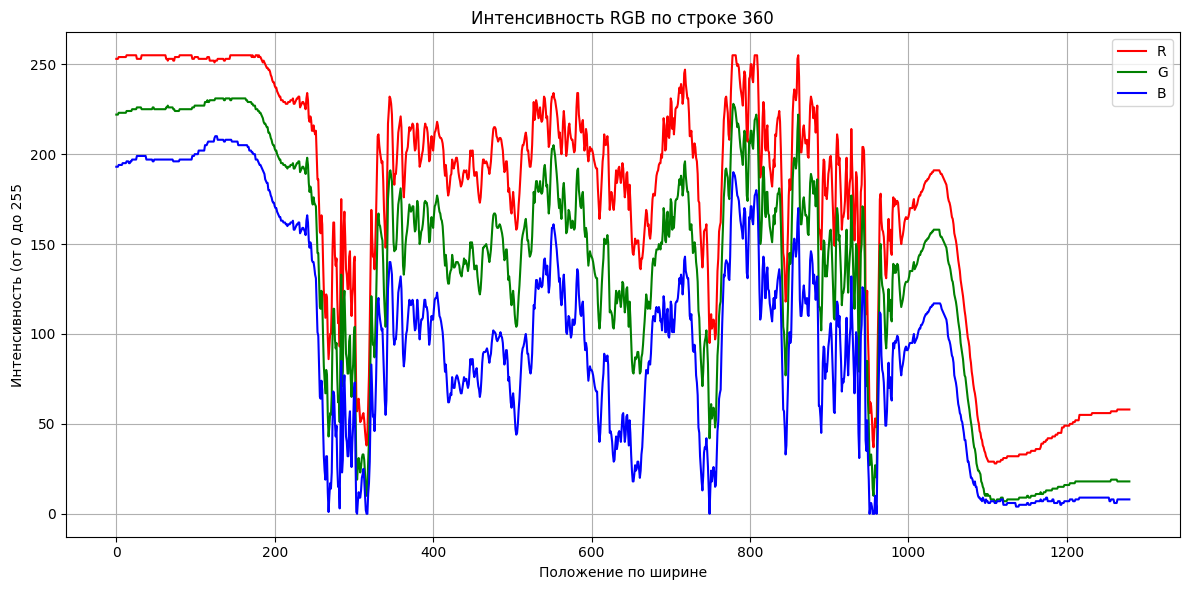

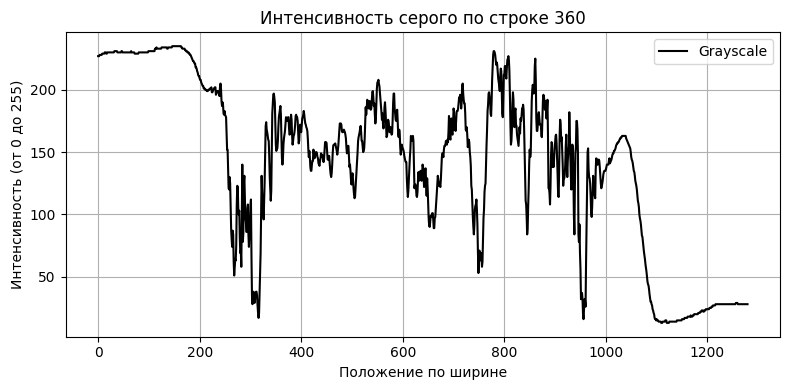

In [4]:
from core.intensity import plot_color_intensity, plot_grayscale_intensity
row = image.shape[0] // 2
plot_color_intensity(image, row)
plot_grayscale_intensity(image, row)

---
## 6. Свёртка функции и обработка краёв

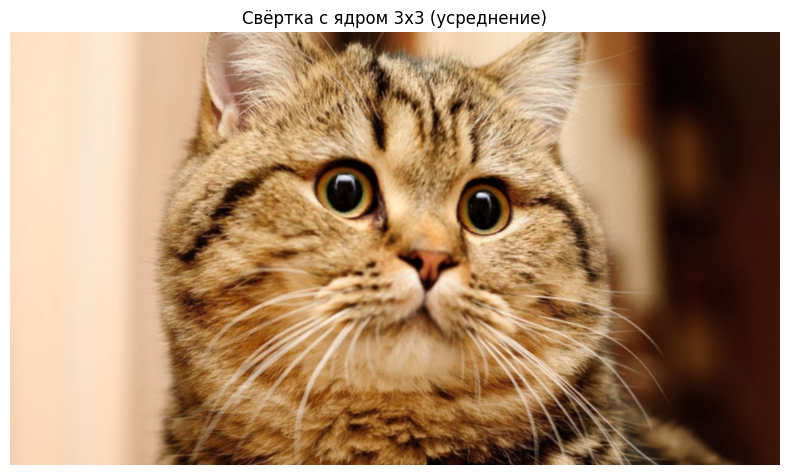

In [5]:
from core.convolution import convolve
import numpy as np

kernel = np.ones((3, 3)) / 9
blurred = convolve(image, kernel)
show(blurred, "Свёртка с ядром 3x3 (усреднение)")

---
## 7. Реализация фильтров

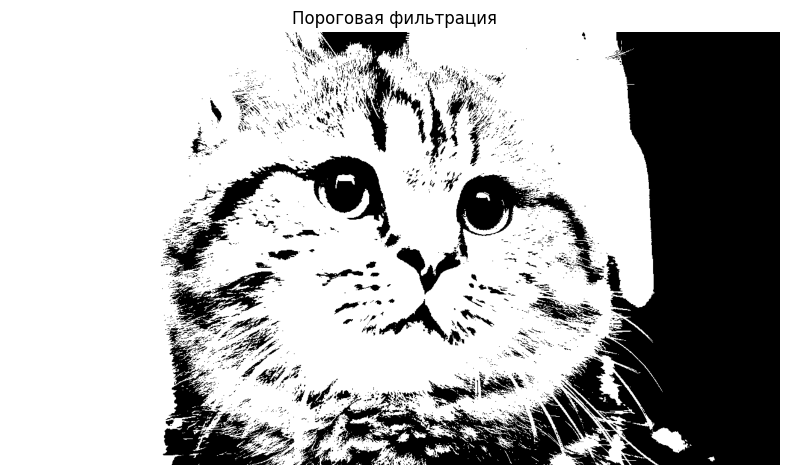

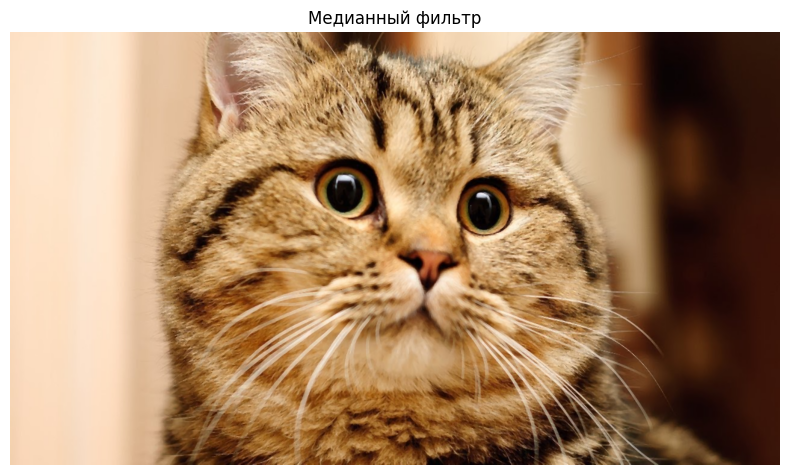

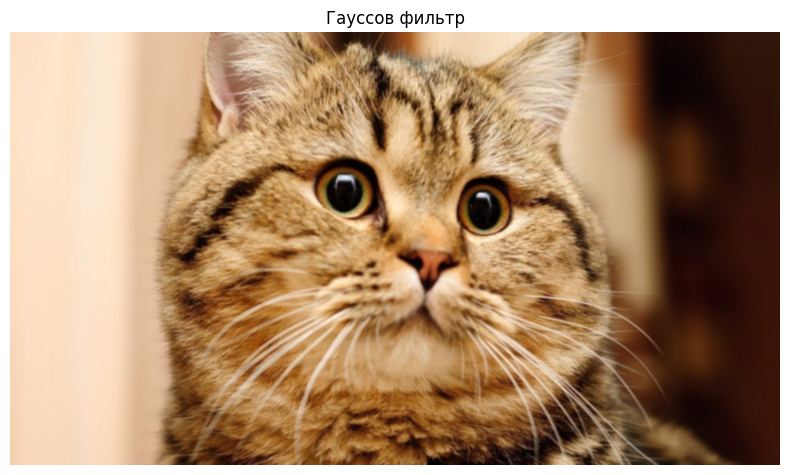

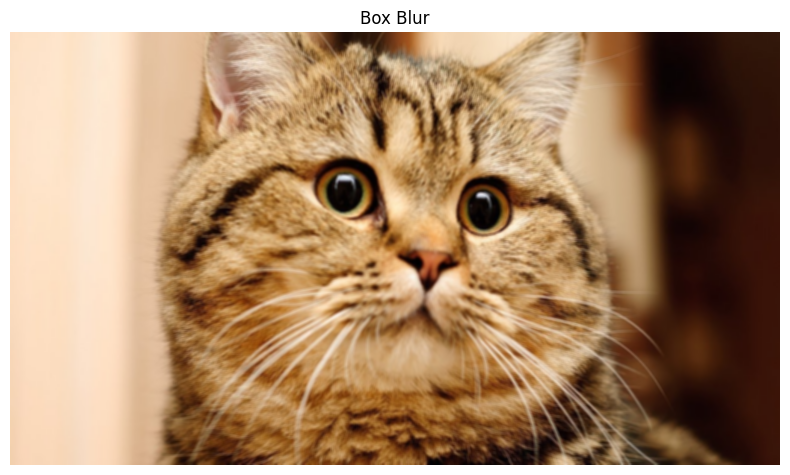

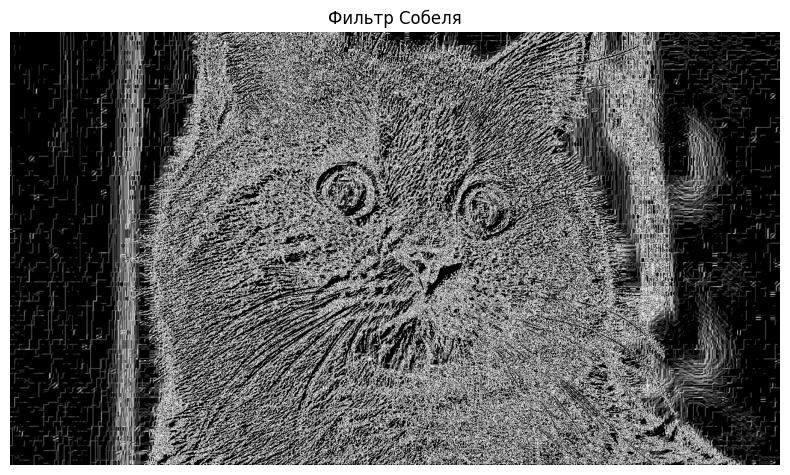

In [6]:
from core.filters.threshold import ThresholdFilter
from core.filters.median import MedianFilter
from core.filters.gaussian import GaussianFilter
from core.filters.box_blur import BoxBlurFilter
from core.filters.sobel import SobelFilter

show(ThresholdFilter(100).apply(image), "Пороговая фильтрация")
show(MedianFilter(3).apply(image), "Медианный фильтр")
show(GaussianFilter(5, 1.2).apply(image), "Гауссов фильтр")
show(BoxBlurFilter(5).apply(image), "Box Blur")
show(SobelFilter().apply(image), "Фильтр Собеля")


---
## 8. Увеличение изображения

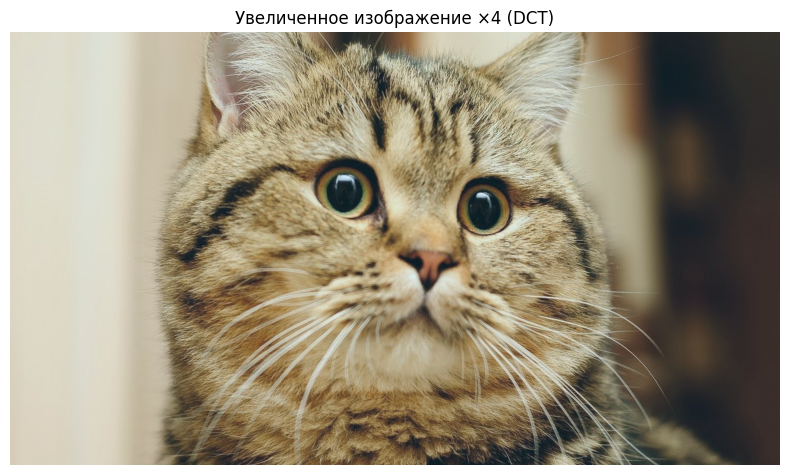

In [7]:
from core.fourier.enlarge import upscale_image_fourier
enlarged = upscale_image_fourier(image, scale=4)
show(enlarged, "Увеличенное изображение ×4 (DCT)")


---
## 9. Спектр изображения (DCT)

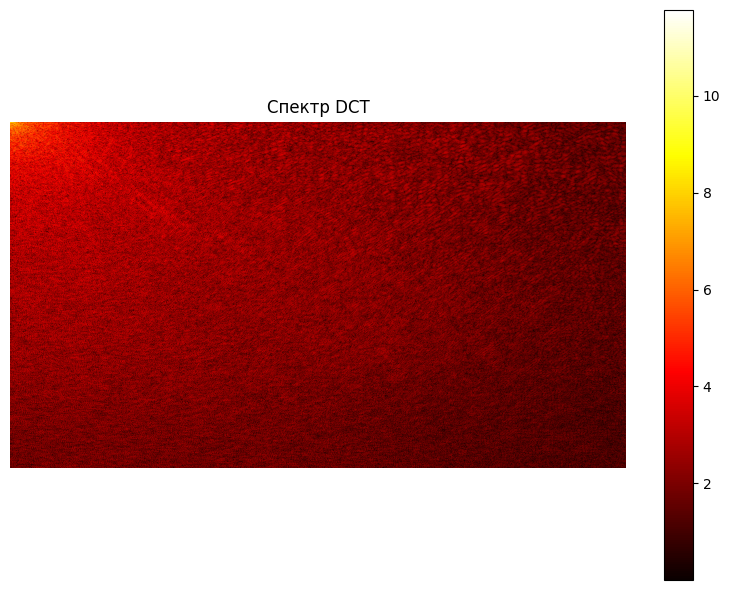

In [8]:
from core.fourier.spectrum import show_dct_spectrum
show_dct_spectrum(image)


---
## 10. Частотная фильтрация

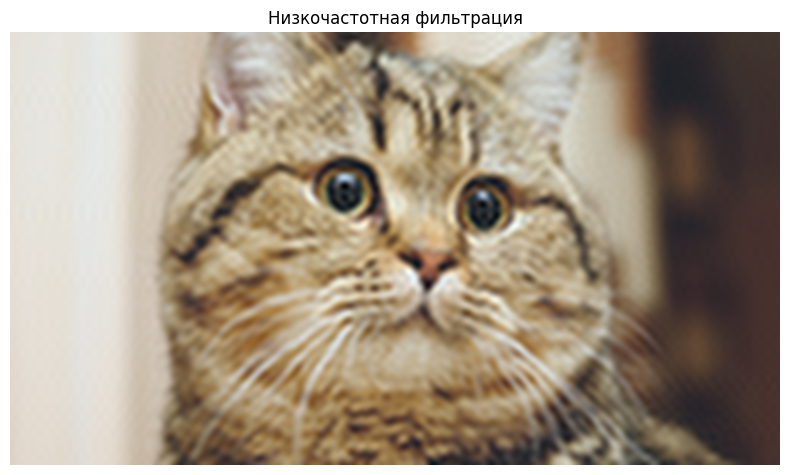

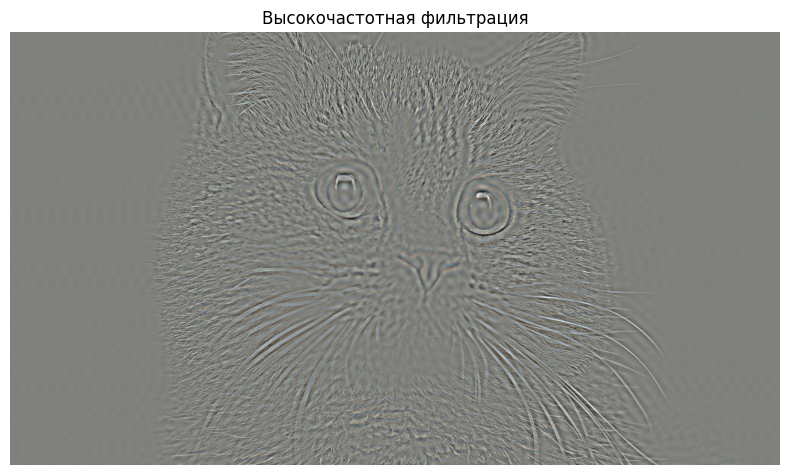

In [9]:
from core.fourier.filtering import low_pass_filter, high_pass_filter
show(low_pass_filter(image, 0.1), "Низкочастотная фильтрация")
show(high_pass_filter(image, 0.1), "Высокочастотная фильтрация")


---